<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Import Libraries
</h1>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer



<h1 style="
    font-family: 'Arial', sans-serif;
    font-size: 2.5em;
    background: linear-gradient(90deg, #FF7F50, #1E90FF);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    text-align: center;
    text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.3);
    margin-bottom: 20px;
    padding: 10px;
">
  Loading and Exploring the dataset
</h1>

### Steps to Analyze `loans.csv` Data Using Pandas

1. **Import pandas and read the CSV file**
   - Load the `loans.csv` file into a DataFrame.

2. **Remove the `Customer ID` column**
   - Drop the `Customer ID` column from the DataFrame.

3. **Print the head of the data**
   - Display the first few rows to review the data structure.

4. **Filter rows with `Current Loan Amount` < 99999999**
   - Exclude rows where the `Current Loan Amount` is too large.

5. **Remove rows with `Annual Income` as NaN**
   - Drop rows where the `Annual Income` column contains missing values.

6. **Extra Task: Impute missing `Annual Income` values**
   - Replace NaN values in `Annual Income` with the column's mean instead of removing them.


In [5]:
# Load the data 

df= pd.read_csv('loans.csv')
df.head(10)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [6]:
# Removing the customer id  and the loan id columns
df.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)


In [7]:
# Loading the shape of dataset  
print(df.shape)

(100514, 17)


In [8]:
# Since the data is too large, I will remove rows where "Current Loan Amount" is more than 99999999

data = df[df["Current Loan Amount"] < 99999999]

data.shape


(88516, 17)

In [9]:
# Checking the NaN values in the dataset
data.isnull().sum()


Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             3794
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    46788
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      177
Tax Liens                           9
dtype: int64

6. **Extra Task: Impute missing `Annual Income` values**
   - Replace NaN values in `Annual Income` with the column's mean instead of removing them.


In [10]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,88516.000000,69362.000000,6.936200e+04,88516.000000,88516.000000,41728.000000,88516.000000,88516.000000,8.851600e+04,8.851400e+04,88339.000000,88507.000000
mean,312313.597881,1134.520977,1.373246e+06,18511.522083,18.152483,34.813027,11.127762,0.168727,2.943458e+05,7.652150e+05,0.117751,0.029512
std,186262.167690,1585.367954,1.103906e+06,12173.763600,6.999045,21.994061,5.005283,0.484092,3.761272e+05,8.892559e+06,0.351513,0.259998
min,10802.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,172342.500000,704.000000,8.462790e+05,10253.730000,13.400000,16.000000,8.000000,0.000000,1.129170e+05,2.718320e+05,0.000000,0.000000
50%,267344.000000,722.000000,1.167759e+06,16275.495000,16.900000,32.000000,10.000000,0.000000,2.100355e+05,4.644860e+05,0.000000,0.000000
75%,432663.000000,740.000000,1.644564e+06,24059.415000,21.600000,51.000000,14.000000,0.000000,3.678780e+05,7.772600e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [11]:
new = data.select_dtypes(include=[np.number])
new.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,88516.000000,69362.000000,6.936200e+04,88516.000000,88516.000000,41728.000000,88516.000000,88516.000000,8.851600e+04,8.851400e+04,88339.000000,88507.000000
mean,312313.597881,1134.520977,1.373246e+06,18511.522083,18.152483,34.813027,11.127762,0.168727,2.943458e+05,7.652150e+05,0.117751,0.029512
std,186262.167690,1585.367954,1.103906e+06,12173.763600,6.999045,21.994061,5.005283,0.484092,3.761272e+05,8.892559e+06,0.351513,0.259998
min,10802.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,172342.500000,704.000000,8.462790e+05,10253.730000,13.400000,16.000000,8.000000,0.000000,1.129170e+05,2.718320e+05,0.000000,0.000000
50%,267344.000000,722.000000,1.167759e+06,16275.495000,16.900000,32.000000,10.000000,0.000000,2.100355e+05,4.644860e+05,0.000000,0.000000
75%,432663.000000,740.000000,1.644564e+06,24059.415000,21.600000,51.000000,14.000000,0.000000,3.678780e+05,7.772600e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<Axes: >

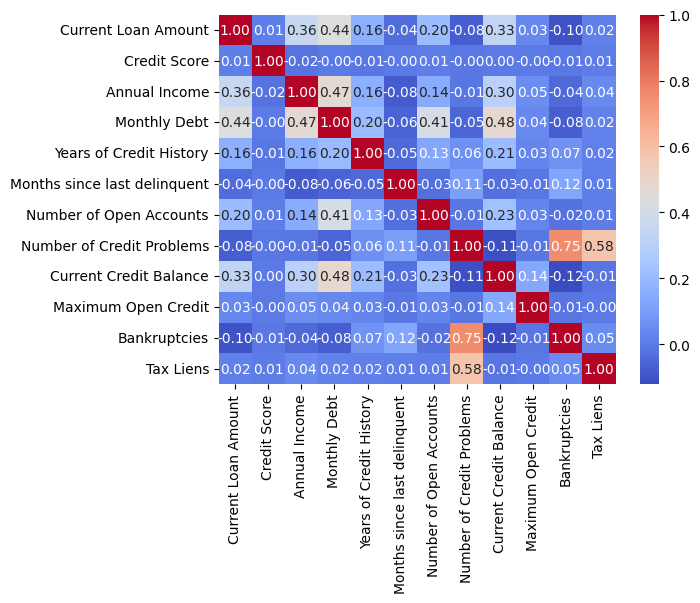

In [12]:
# correlation matrix just numeric columns
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [13]:
# Calculate the percentage of null values in the dataset.
null_values = data.isnull().sum()
null_values = null_values[null_values > 0].sort_values(ascending=False).head(7)
null_values_percentage = (null_values / data.shape[0]) * 100
null_values_df = pd.DataFrame({'Column Name': null_values.index, 'Number of Null Values': null_values.values, 'Percentage': null_values_percentage.values})
null_values_df


,Column Name,Number of Null Values,Percentage
0,Months since last delinquent,46788,52.858240
1,Annual Income,19154,21.639026
2,Credit Score,19154,21.639026
3,Years in current job,3794,4.286231
4,Bankruptcies,177,0.199964
5,Tax Liens,9,0.010168
6,Maximum Open Credit,2,0.002259


In [14]:
#Example: Impute missing values with mean for numerical data

 
num_imputer = SimpleImputer(strategy='mean')
new = num_imputer.fit_transform(new)


In [15]:
cat_imputer = SimpleImputer(strategy='most_frequent')
imputed_categorical_data = cat_imputer.fit_transform(new)

In [16]:
# Convert the NumPy array back to a pandas DataFrame
new_df = pd.DataFrame(new, columns=data.select_dtypes(include=[np.number]).columns)

# Fill NaN values in the "Credit Score" column with the mean of the column
new_df["Credit Score"] = new_df["Credit Score"].fillna(new_df["Credit Score"].mean())

new_df["Annual Income"] = new_df["Annual Income"].fillna(new_df["Annual Income"].mean())      
new_df["Tax Liens"] = new_df["Tax Liens"].fillna(new_df["Tax Liens"].mode()[0])
new_df["Maximum Open Credit"] = new_df["Maximum Open Credit"].fillna(new_df["Maximum Open Credit"].mean())

In [17]:
new_df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,88516.000000,88516.000000,8.851600e+04,88516.000000,88516.000000,88516.000000,88516.000000,88516.000000,8.851600e+04,8.851600e+04,88516.000000,88516.000000
mean,312313.597881,1134.520977,1.373246e+06,18511.522083,18.152483,34.813027,11.127762,0.168727,2.943458e+05,7.652150e+05,0.117751,0.029512
std,186262.167690,1403.393018,9.771955e+05,12173.763600,6.999045,15.100995,5.005283,0.484092,3.761272e+05,8.892459e+06,0.351161,0.259985
min,10802.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,172342.500000,710.000000,9.366050e+05,10253.730000,13.400000,34.000000,8.000000,0.000000,1.129170e+05,2.718320e+05,0.000000,0.000000
50%,267344.000000,733.000000,1.373246e+06,16275.495000,16.900000,34.813027,10.000000,0.000000,2.100355e+05,4.644860e+05,0.000000,0.000000
75%,432663.000000,1134.520977,1.489296e+06,24059.415000,21.600000,34.813027,14.000000,0.000000,3.678780e+05,7.772600e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [18]:
new_df.isnull().sum()

Current Loan Amount             0
Credit Score                    0
Annual Income                   0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [19]:
# Since "Months since last delinquent" has 52.8% of missing values, I will drop this column.
data = data.drop(["Months since last delinquent"], axis=1)

null_values_df.drop(index=0, inplace=True)

In [20]:
null_values_df

,Column Name,Number of Null Values,Percentage
1,Annual Income,19154,21.639026
2,Credit Score,19154,21.639026
3,Years in current job,3794,4.286231
4,Bankruptcies,177,0.199964
5,Tax Liens,9,0.010168
6,Maximum Open Credit,2,0.002259


In [21]:
# Let's handle the missing values
data["Credit Score"] = data["Credit Score"].fillna(data["Credit Score"].mean())
data["Annual Income"] = data["Annual Income"].fillna(data["Annual Income"].mean())      
data["Tax Liens"] = data["Tax Liens"].fillna(data["Tax Liens"].mode())
data["Maximum Open Credit"] = data["Maximum Open Credit"].fillna(data["Maximum Open Credit"].mean())


In [22]:
data["Bankruptcies"].value_counts()

Bankruptcies
0.0    78576
1.0     9287
2.0      361
3.0       81
4.0       24
5.0        7
6.0        2
7.0        1
Name: count, dtype: int64

In [23]:
data["Bankruptcies"] = data["Bankruptcies"].fillna(data["Bankruptcies"].mean())

In [24]:
# Fill the "NaH" values of the "Years in current job" with mean () does not work because has categorical values
data["Years in current job"].value_counts() 
# Fill the "NaH" values of the "Years in current job" with the most frequent value
data["Years in current job"] = data["Years in current job"].fillna(data["Years in current job"].mode()[0])


In [25]:
data.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    9
dtype: int64

In [26]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,88516.000000,88516.000000,8.851600e+04,88516.000000,88516.000000,88516.000000,88516.000000,8.851600e+04,8.851600e+04,88516.000000,88507.000000
mean,312313.597881,1134.520977,1.373246e+06,18511.522083,18.152483,11.127762,0.168727,2.943458e+05,7.652150e+05,0.117751,0.029512
std,186262.167690,1403.393018,9.771955e+05,12173.763600,6.999045,5.005283,0.484092,3.761272e+05,8.892459e+06,0.351161,0.259998
min,10802.000000,585.000000,7.662700e+04,0.000000,3.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,172342.500000,710.000000,9.366050e+05,10253.730000,13.400000,8.000000,0.000000,1.129170e+05,2.718320e+05,0.000000,0.000000
50%,267344.000000,733.000000,1.373246e+06,16275.495000,16.900000,10.000000,0.000000,2.100355e+05,4.644860e+05,0.000000,0.000000
75%,432663.000000,1134.520977,1.489296e+06,24059.415000,21.600000,14.000000,0.000000,3.678780e+05,7.772600e+05,0.000000,0.000000
max,789250.000000,7510.000000,1.655574e+08,435843.280000,70.500000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


<Axes: >

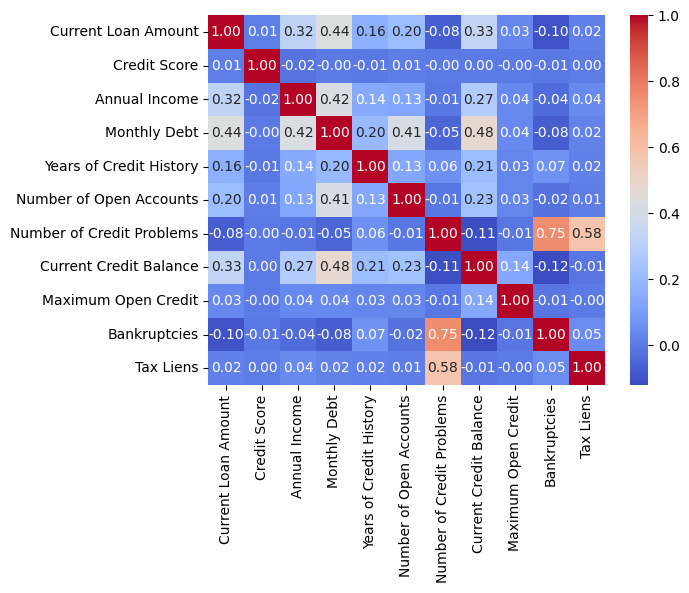

In [27]:
# correlation matrix just numeric columns
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")